**6. Use the following code snippet to create different types of scattered data:**

In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import SpectralClustering, DBSCAN
from sklearn import cluster, datasets, mixture

In [5]:
# Import the classes from the unsupervised package
file_path = os.getcwd()
parent_path = Path(file_path)
parent_path = parent_path.parent.as_posix()
sys.path.append(str(parent_path +'/Unsupervised_model'))

from KMeans import KMeans
from Kmedoids import KMedoids 

In [3]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

*a. Plot the different datasets in separate figures. What can you say about them?*

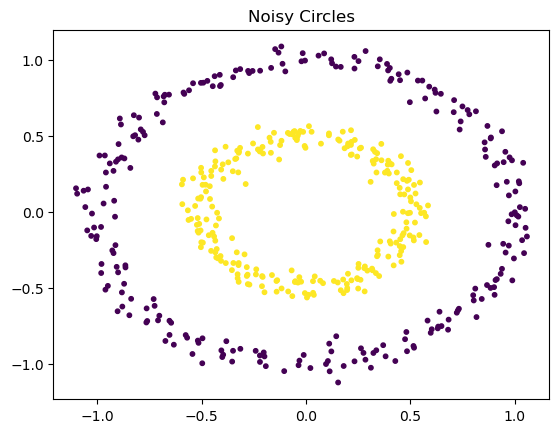

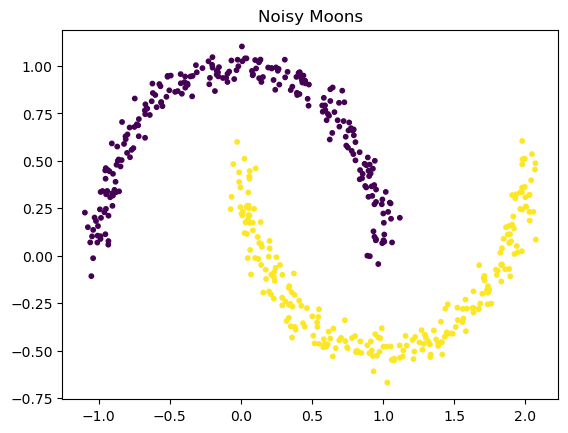

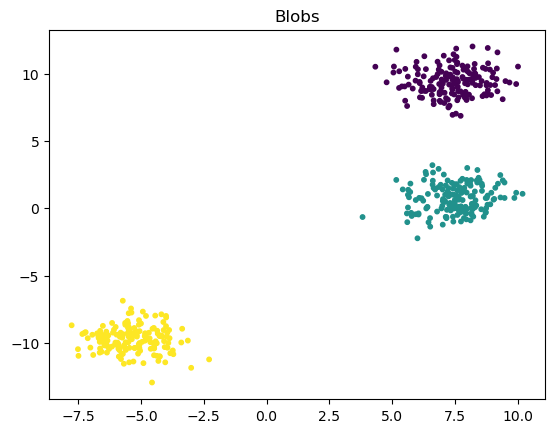

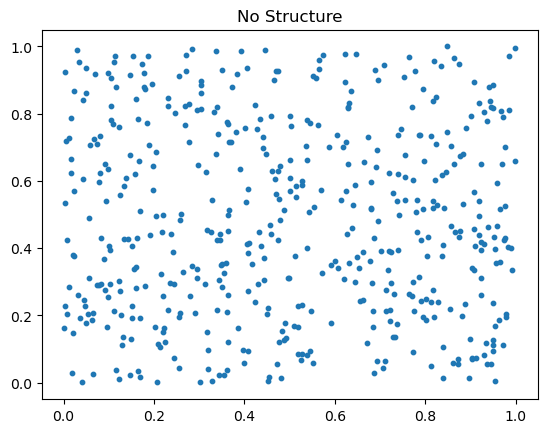

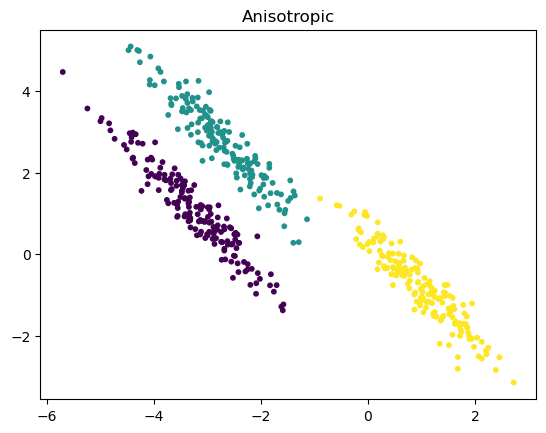

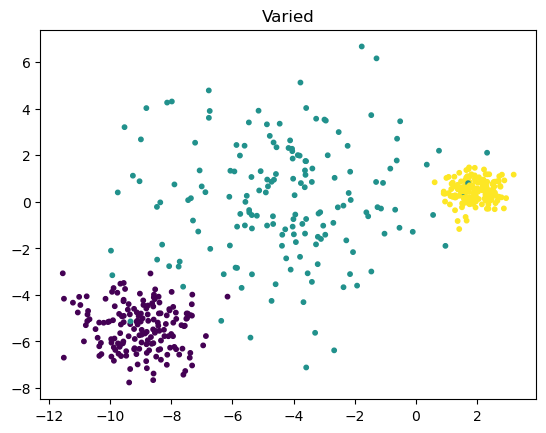

In [4]:
datasets = [('Noisy Circles', noisy_circles),
                ('Noisy Moons', noisy_moons),
                        ('Blobs', blobs),  
                            ('No Structure', no_structure), 
                                  ('Anisotropic', aniso),    
                                  ('Varied', varied),]

for i, (name, dataset) in enumerate(datasets):
    X, y = dataset
    plt.figure(i)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
    plt.title(name)
plt.show()

* Noisy circles: This data set consists of two circles that cannot be clearly separated.
* Noisy Moons: This dataset consists of two half-moon shapes that are not clearly separable
* Blobs: This data set consists of three blobs that are clearly separable.
* No Structure: This dataset consists of randomly distributed points with no clear structure or clusters.
* Anisotropic: This dataset consists of three clusters of points that are elongated in different directions.
* Varied: This dataset consists of three clusters of points with different variances in each cluster

**Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each
dataset and compare the results of each algorithm with respect to each dataset.**

In [ ]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4)
# fit the data & predict cluster labels
kmeans.fit(X)
cluster_kmeans = kmeans.predict(X)

In [ ]:
# Initialize KMeans
kmedoids = KMedoids(n_clusters=4)
# fit the data & predict cluster labels
kmedoids.fit(X)
cluster_kmedoids = kmedoids.predict(X)

In [11]:
algorithms = {
    'KMeans': KMeans(n_clusters=3),
    'KMedoids': KMedoids(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=10),
    'Spectral Clustering': SpectralClustering(n_clusters=3, affinity='nearest_neighbors')}


Dataset: Noisy Circles



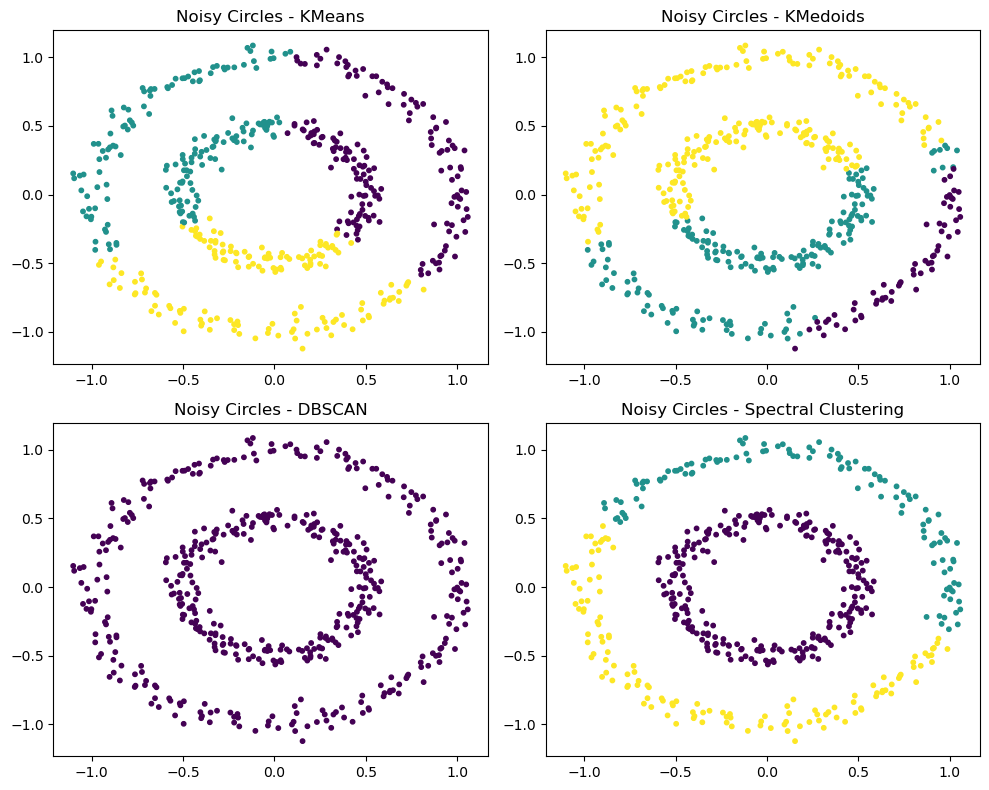

Dataset: Noisy Moons



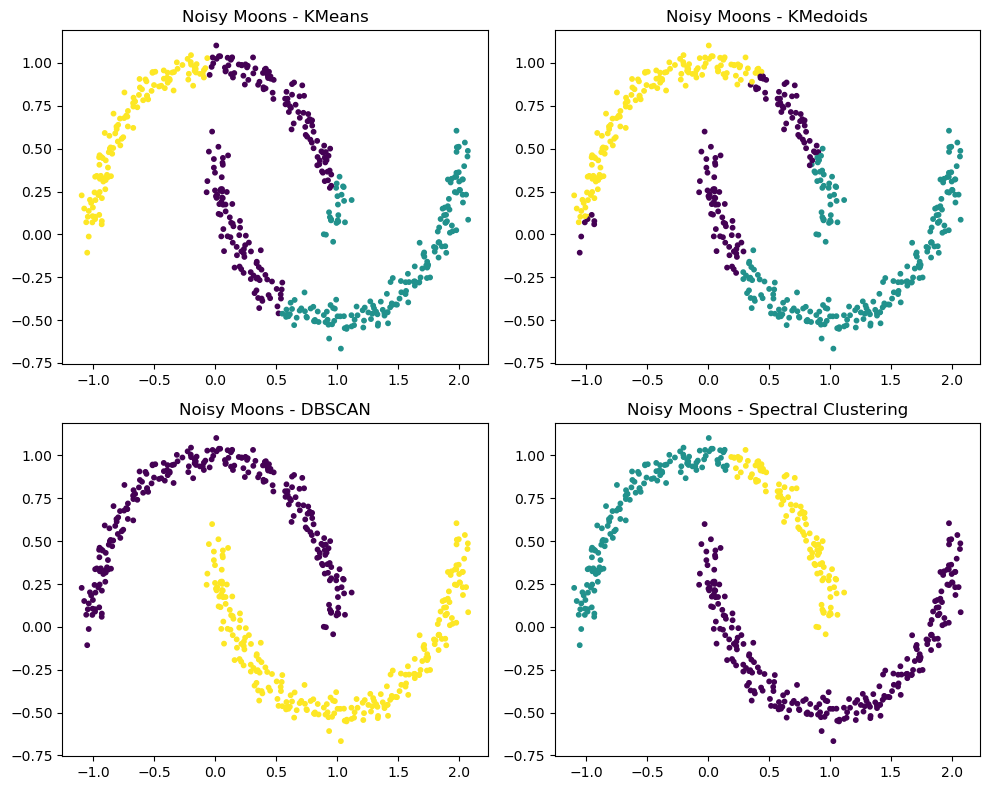

Dataset: Blobs



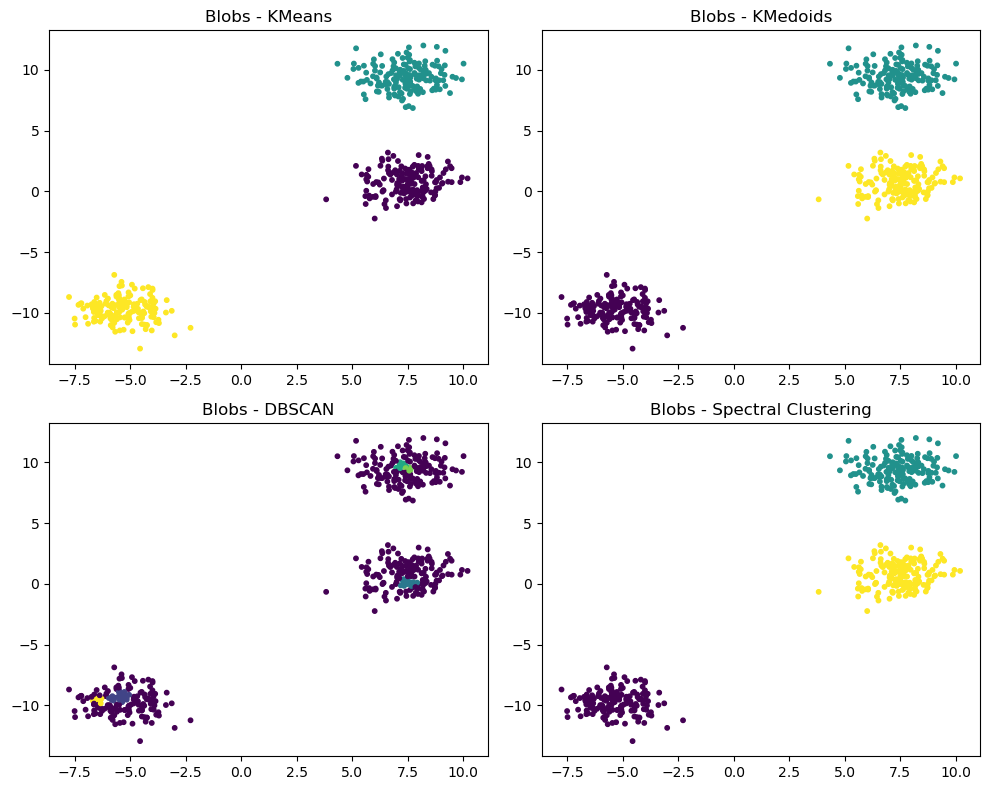

Dataset: No Structure



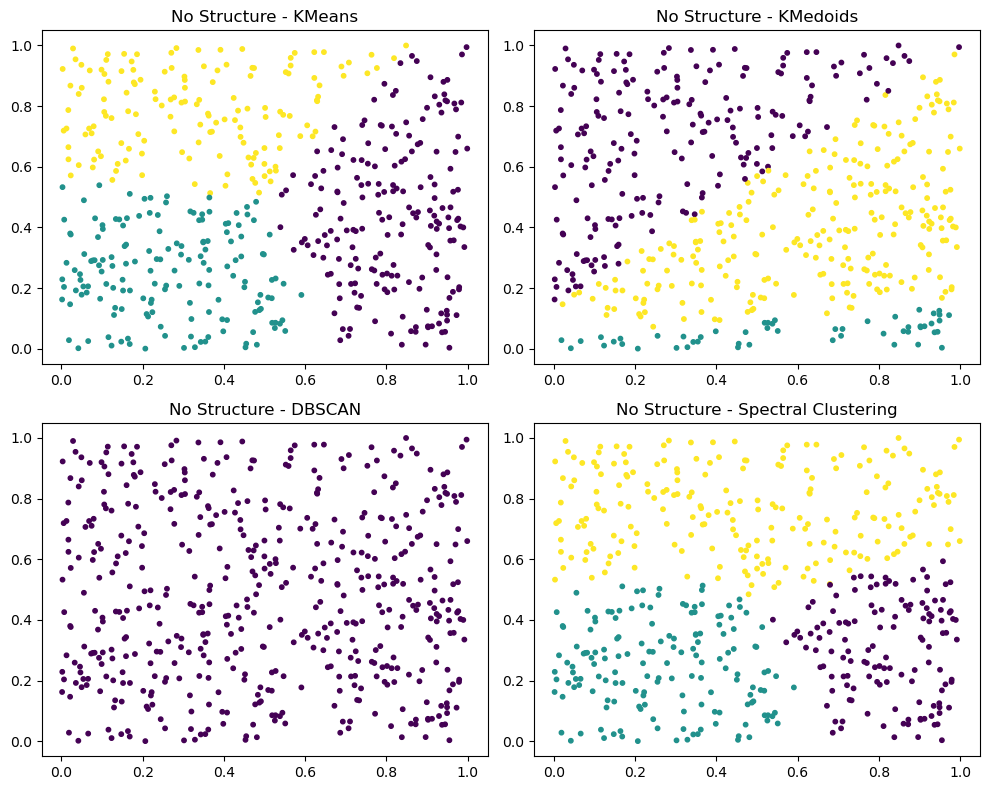

Dataset: Anisotropic



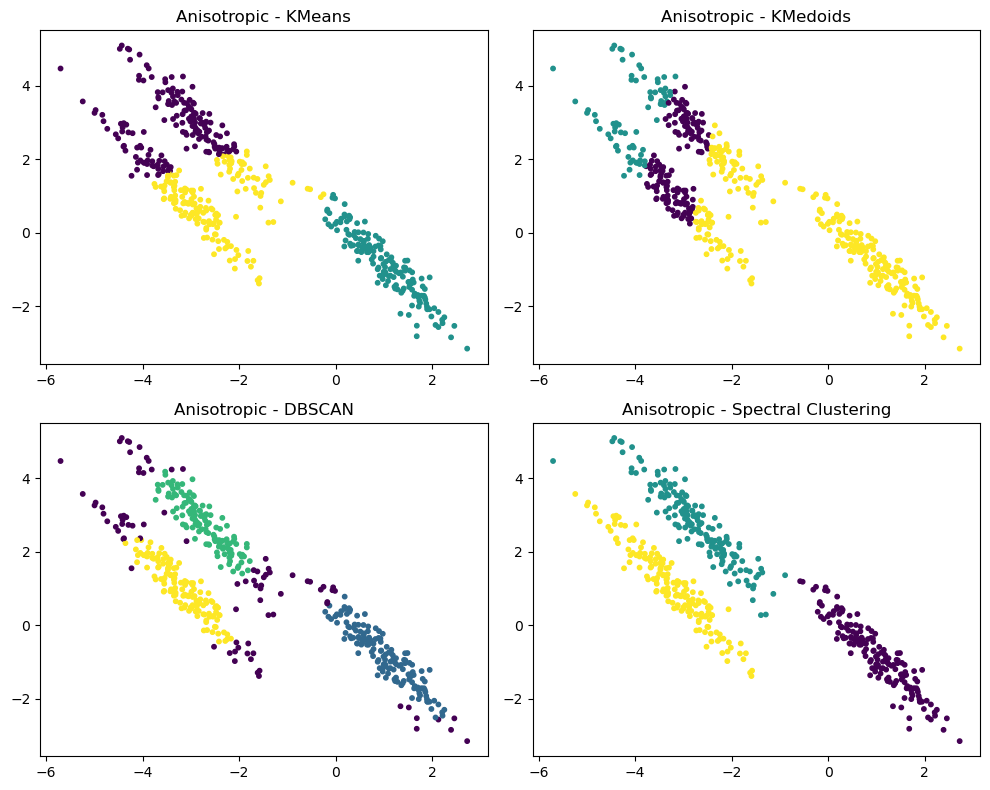

Dataset: Varied



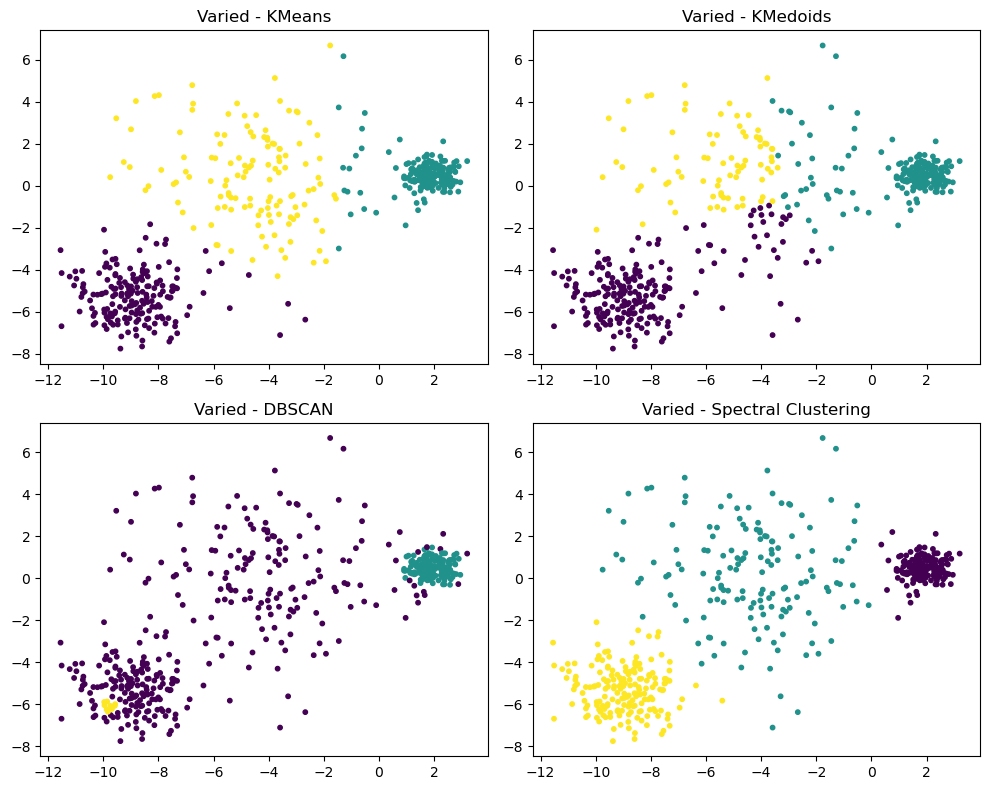

In [41]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

alg_idx_map = {'KMeans': 0, 'KMedoids': 1, 'DBSCAN': 2, 'Spectral Clustering': 3}

for i, (name, dataset) in enumerate(datasets):
    X, y = dataset
    print(f'Dataset: {name}\n')
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

    for ax, (alg_name, alg) in zip(axes.flatten(), algorithms.items()):

        if alg_name == 'KMeans':
            # Initialize KMeans
            # fit the data & predict cluster labels
            kmeans = KMeans(n_clusters=3)
            kmeans.fit(X)
            y_pred = kmeans.predict(X)
        elif alg_name == 'KMedoids':  
            kmedoids = KMedoids(n_clusters=3)
            # fit the data & predict cluster labels
            kmedoids.fit(X)
            y_pred = kmedoids.predict(X)
        else:
            y_pred = alg.fit_predict(X)

        ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=10)
        ax.set_title(f'{name} - {alg_name}')
    
    plt.tight_layout()
    plt.show()